In [1]:
import pandas as pd
import os

def load_diamond_data():
    csv_path = os.path.join("diamonds-dataset", "diamonds-train.csv")
    return pd.read_csv(csv_path)

In [2]:
#Carrega os dados de treino e faz feature scaling(depth, table)
import numpy as np
diamond_data = load_diamond_data()
diamond_data["depth"] = (diamond_data["depth"] / 10)
diamond_data["table"] = (diamond_data["table"] / 10)

In [3]:
#dummy coding(cut,color,clarity)
from sklearn.preprocessing import LabelEncoder
diamond_data = load_diamond_data()
diamond_data["depth"] = diamond_data["depth"] / 10
diamond_data["table"] = diamond_data["table"] / 10

enumValues = {"cut": {"Fair":0, "Good":1, "Very Good":2, "Premium":3, "Ideal":4},
              "color": {"J": 0, "I":1, "H":2, "G":3, "F":4, "E":5, "D":6},
              "clarity": {"I1":0, "SI2":1, "SI1":2, "VS2":3, "VS1":4,"VVS2":5, "VVS1":6, "IF":7}}
diamond_data.replace(enumValues, inplace=True)


In [4]:
# Normal Equation

def NormalEquation(X, y):

    transpose = X.T

    mult1 = transpose.dot(X)

    try:
        inverse = np.linalg.inv(mult1)

    except np.linalg.LinAlgError:
        print("Not invertible")
        return np.zeros(1,1)

    else:
        mult2 = (inverse.dot(transpose)).dot(y)
        return mult2


In [5]:
import numpy as np

#function add a first column filled with 1's and delete de last colum
def prepareSet(setToPrepare):
    X = np.array(setToPrepare)

    X = np.delete(X, -1, axis=1)

    X = np.c_[np.ones((len(X), 1)),X]

    y = np.array(setToPrepare["price"])

    return X,y

In [6]:
# #grafico Carat X Price
# import matplotlib.pyplot as plt
# plt.scatter(diamond_data["carat"], diamond_data["price"])
# plt.xlabel("$carat$", fontsize=18)
# plt.ylabel("$price(U$)$", fontsize=18)
# plt.show()

In [7]:
# #grafico Cut X Price
# import matplotlib.pyplot as plt
# plt.scatter(diamond_data["cut"], diamond_data["price"])
# plt.xlabel("$cut$", fontsize=18)
# plt.ylabel("$price$", fontsize=18)
# plt.show()

In [8]:
# #grafico  Color X Price
# import matplotlib.pyplot as plt
# plt.scatter(diamond_data["color"], diamond_data["price"])
# plt.xlabel("$color$", fontsize=18)
# plt.ylabel("$price$", fontsize=18)
# plt.show()

In [9]:
# #grafico Clarity X Price
# import matplotlib.pyplot as plt
# plt.scatter(diamond_data["clarity"], diamond_data["price"])
# plt.xlabel("$clarity$", fontsize=18)
# plt.ylabel("$price$", fontsize=18)
# plt.show()

In [10]:
# #grafico Depth X Price
# import matplotlib.pyplot as plt
# plt.scatter(diamond_data["depth"], diamond_data["price"])
# plt.xlabel("$depth$", fontsize=18)
# plt.ylabel("$price$", fontsize=18)
# plt.show()

In [11]:
# #grafico table X Price
# import matplotlib.pyplot as plt
# plt.scatter(diamond_data["table"], diamond_data["price"])
# plt.xlabel("$table$", fontsize=18)
# plt.ylabel("$price$", fontsize=18)
# plt.show()

In [12]:
# #grafico x X Price
# import matplotlib.pyplot as plt
# plt.scatter(diamond_data["x"], diamond_data["price"])
# plt.xlabel("$x$", fontsize=18)
# plt.ylabel("$price$", fontsize=18)
# plt.show()

In [13]:
# #grafico y X Price
# import matplotlib.pyplot as plt
# plt.scatter(diamond_data["y"], diamond_data["price"])
# plt.xlabel("$y$", fontsize=18)
# plt.ylabel("$price$", fontsize=18)
# plt.show()

In [14]:
# #grafico z X Price
# import matplotlib.pyplot as plt
# plt.scatter(diamond_data["z"], diamond_data["price"])
# plt.xlabel("$z$", fontsize=18)
# plt.ylabel("$price$", fontsize=18)
# plt.show()

In [15]:
# Cross Validation Generation

# PRECISA CHAMAR ISSO ANTES DE CHAMAR A FUNCAO --- 
#                             TRAINING_DATA = prepareSet(diamond_data) 

from sklearn.model_selection import train_test_split, KFold

#essa funcao retorna um gerador de indices
def generate_sets(TRAINING_DATA,type='kfold'):

    # Cross validation using train_test_split
    if (type == 'split'):
       return train_test_split(TRAINING_DATA,test_size=0.2,random_state=0)

    # Cross validation using K-Fold
    # K = 5, Shuffle = true, Seed = 21
    elif (type == 'kfold'):
        kfold_seed = 21

        kfold = KFold(n_splits=5, shuffle=True, random_state=kfold_seed)
        return kfold.split(TRAINING_DATA)

## Explicação do uso do generate_sets

In [16]:

# import numpy as np
# from sklearn.model_selection import train_test_split, KFold

# X = np.array([[10, 20], [30, 40], [50, 60], [70, 80], [90, 100], [110, 120], [130, 140], [150, 160], [170, 180], [190, 200]])
# y = np.array(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'])

# #esse b vai ser um gerador, não precisa passar y pois ele gera somente os indices
# b = generate_sets(X)

# #precisa percorrer ele com 2 indices, um representa o treino, outro o test, 
# # na proxima iteracao ele ja vai estar num agrupamento diferente
# for train_index, val_index in b:
#     x_train = X[train_index]
#     y_train = y[train_index]
#     x_val = X[val_index]
#     y_val = y[val_index]
#     print(x_train, y_train)
#     print(x_val, y_val)
#     print("-----")
    


In [20]:
#implementation Linear Regression using Mini-Batch Gradient Descent
def LinRegMiniGradientDescent(TRAIN_SET, TARGET_SET, N_ITERATION, LEARNING_RATE, SIZE_BATCH):
    np.random.seed(42)
    theta = np.random.randn(10,1) #random initialization
    for iteration in range(N_ITERATIONS):
        shuffle_indices = np.random.permutation(TRAIN_SET.shape[0])
        train_shuffled = TRAIN_SET[shuffled_indices]
        target_shuffled = TARGET_SET[shuffled_indices]
        for i in range(0,TARGET_SET.shape[0], SIZE_BATCH):
            xi = train_shuffled[i:i+SIZE_BATCH]
            yi = target_shuffled[i:i+SIZE_BATCH]
            gradients = 2/SIZE_BATCH * xi.T.dot(xi.dot(theta) - yi)
            theta = theta - LEARNING_RATE * gradients
    return theta

In [30]:
import numpy as np
import random


def LinRegBatchGradientDescent(x, y, numIterations, learningRate):
    xTrans = x.transpose()
    theta = np.random.randn(x.shape[1],1) #random initialization
    m = x.shape[0]
    y = y.reshape((y.shape[0],1))
    for i in range(numIterations):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y
        cost = np.sum(loss ** 2) / (2 * m)
        gradient = np.dot(xTrans, loss) / m
        theta = theta - learningRate * gradient
    return theta

In [31]:
import numpy as np
import random


def LinRegBatchGradientDescentCostPerIteraction(x, y, numIterations, learningRate):
    xTrans = x.transpose()
    theta = np.random.randn(x.shape[1],1) #random initialization
    m = x.shape[0]
    y = y.reshape((y.shape[0],1))
    cost = np.zeros((numIterations,1))
    for i in range(numIterations):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y
        cost[i] = np.sum(loss ** 2) / (2 * m)
        gradient = np.dot(xTrans, loss) / m
        theta = theta - learningRate * gradient
    return theta, cost

# Proximos 4 celulas e pra mostrar que o nosso LinRegBatchGradientDescent funciona

In [22]:
##DATA SET PARA testar A FUNCAO DEPOIS
import numpy as np
import numpy.random as rnd

np.random.seed(42)
X = 2 * rnd.rand(100,1)
y = 4 + 3 * X + rnd.randn(100,1)

In [23]:
import numpy.linalg as LA

X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = LA.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.21509616],
       [2.77011339]])

In [24]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([4.21413037]), array([2.77067691]))

In [25]:
theta, error = LinRegBatchGradientDescent(X_b,y,100,0.1)
type(y)

numpy.ndarray

 --------------------------------------------------------

### Plotar CostFunction x Iteration

In [27]:

# import matplotlib.pyplot as plt
# import numpy as pd
# %matplotlib inline
# theta, error = LinRegBatchGradientDescent(X_b,y,100,0.1)
# print(theta)
# plt.plot(np.arange(error.shape[0]) ,error)
# plt.ylabel('Cost Function')
# plt.xlabel('Iterations')
# plt.axis([0,20,0,100])



________________________________

# ideias de modelos
usando todas as features
<br>
&nbsp;&nbsp;normal
&nbsp;&nbsp;ao quadrado
<br>
tirando as features que nao aparentam influenciar
<br>
&nbsp;&nbsp;normal
&nbsp;&nbsp; ao quadrado


### MODELO 1 : Modelo com todas as features

In [79]:
from sklearn.metrics import mean_squared_error

x1,y1 = prepareSet(diamond_data)
indices_generator = generate_sets(x1)
theta1 = np.zeros((5,x1.shape[1],1))
error1 = np.zeros((5,1))
error1_n = np.zeros((5,1)) 
i=0
for train_index, val_index in indices_generator:
    #dados de treino e de validacao
    x1_train = x1[train_index]
    y1_train = y1[train_index]
    x1_val = x1[val_index]
    y1_val = y1[val_index]
     
    theta1[i] = LinRegBatchGradientDescent(x1_train,y1_train,10000,0.01)
    thetaNormal = NormalEquation(x1_train,y1_train)
    
    #error from validation
    y1_predict = x1_val.dot(theta1[i])
    y1_n_predict = x1_val.dot(thetaNormal)
    error1[i] = mean_squared_error(y1_val, y1_predict)
    error1_n[i] = mean_squared_error(y1_val, y1_n_predict)/2
    i += 1




In [80]:
np.set_printoptions(precision=1)
for i in range(5):
    print("Iteracao ", i+1,)
    print("\tErro pelo Gradient Descent:", int(error1[i]) )
    print("\tErro pela Equacao Normal:   " , int(error1_n[i]) )

print("Media erros GD:", int(np.mean(error1)) )
print("Media erros EN: ", int(np.mean(error1_n)) )


Iteracao  1
	Erro pelo Gradient Descent: 1600877
	Erro pela Equacao Normal:    724963
Iteracao  2
	Erro pelo Gradient Descent: 1613201
	Erro pela Equacao Normal:    732478
Iteracao  3
	Erro pelo Gradient Descent: 1699356
	Erro pela Equacao Normal:    771709
Iteracao  4
	Erro pelo Gradient Descent: 1689004
	Erro pela Equacao Normal:    897075
Iteracao  5
	Erro pelo Gradient Descent: 1580719
	Erro pela Equacao Normal:    720242
Media erros GD: 1636631
Media erros EN:  769293


In [74]:
indices_generator = generate_sets(x1)
theta1 = np.zeros((5,x1.shape[1],1))
error1 = np.zeros((5,1))
error1_n = np.zeros((5,1)) 
i=0
for train_index, val_index in indices_generator:
    #dados de treino e de validacao
    x1_train = x1[train_index]
    y1_train = y1[train_index]
    x1_val = x1[val_index]
    y1_val = y1[val_index]
     
    theta1[i],cost = LinRegBatchGradientDescentCostPerIteraction(x1_train,y1_train,10000,0.1)
    
    #error from validation
    y1_predict = x1_val.dot(theta1[i])
    error1[i] = mean_squared_error(y1_val, y1_predict)

    i += 1
    break

[0, 2000, 0, 10000000]

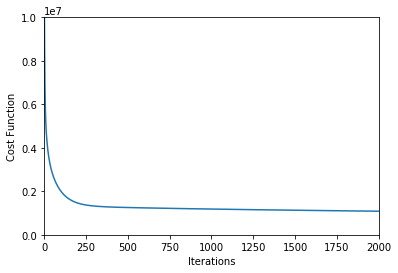

In [77]:
import matplotlib.pyplot as plt
import numpy as pd
%matplotlib inline

plt.plot(range(cost.shape[0]) ,cost)
plt.ylabel('Cost Function')
plt.xlabel('Iterations')
plt.axis([0,2000,0,10000000])



-------------------------------------------------------------------------------------------

### Modelo 2: sem as features que nao aparentam ter significado no resultado (table,depth,clarity,color,cut)

In [66]:
from sklearn.metrics import mean_squared_error

data = diamond_data[['x', 'y', 'z', 'carat', 'price']]
x2,y2 = prepareSet(data)
indices_generator = generate_sets(x2)
theta2 = np.zeros((5,x2.shape[1],1))
error2 = np.zeros((5,1))
error2_n = np.zeros((5,1)) 
i=0
for train_index, val_index in indices_generator:
    #dados de treino e de validacao
    x2_train = x2[train_index]
    y2_train = y2[train_index]
    x2_val = x2[val_index]
    y2_val = y2[val_index]
     
    theta2[i] = LinRegBatchGradientDescent(x2_train,y2_train,10000,0.001)
    thetaNormal = NormalEquation(x2_train,y2_train)
    
    #error from validation
    y2_predict = x2_val.dot(theta2[i])
    y2_n_predict = x2_val.dot(thetaNormal)
    error2[i] = mean_squared_error(y2_val, y2_predict)
    error2_n[i] = mean_squared_error(y2_val, y2_n_predict)/2
    i += 1

In [67]:
np.set_printoptions(precision=1)
for i in range(5):
    print("Iteracao ", i+1,)
    print("\tErro pelo Gradient Descent:", int(error2[i]) )
    print("\tErro pela Equacao Normal:  " , int(error2_n[i]) )

print("Media erros GD:", int(np.mean(error2)) )
print("Media erros EN:", int(np.mean(error2_n)) )

Iteracao  1
	Erro pelo Gradient Descent: 2876822
	Erro pela Equacao Normal:   1109230
Iteracao  2
	Erro pelo Gradient Descent: 3033826
	Erro pela Equacao Normal:   1155806
Iteracao  3
	Erro pelo Gradient Descent: 3154459
	Erro pela Equacao Normal:   1188962
Iteracao  4
	Erro pelo Gradient Descent: 3074598
	Erro pela Equacao Normal:   1886008
Iteracao  5
	Erro pelo Gradient Descent: 2940102
	Erro pela Equacao Normal:   1141531
Media erros GD: 3015961
Media erros EN: 1296307


### Modelo 3 : sem as features que nao aparentam ter significado no resultado, so que com elas ao quadrado

In [73]:
from sklearn.metrics import mean_squared_error

data = diamond_data[['x', 'y', 'z', 'carat', 'price']]
data.insert(loc=0, column='x2', value = data['x']**2)
data.insert(loc=0, column='y2', value = data['y']**2)
data.insert(loc=0, column='z2', value = data['z']**2)
data.insert(loc=0, column='carat2', value = data['carat']**2)
x3,y3 = prepareSet(data)
indices_generator = generate_sets(x3)
theta3 = np.zeros((5,x3.shape[1],1))
error3 = np.zeros((5,1))
error3_n = np.zeros((5,1)) 
i=0
for train_index, val_index in indices_generator:
    #dados de treino e de validacao
    x3_train = x3[train_index]
    y3_train = y3[train_index]
    x3_val = x3[val_index]
    y3_val = y3[val_index]
     
    theta3[i] = LinRegBatchGradientDescent(x3_train,y3_train,10000,0.001)
    thetaNormal = NormalEquation(x3_train,y3_train)
    
    #error from validation
    y3_predict = x3_val.dot(theta3[i])
    y3_n_predict = x3_val.dot(thetaNormal)
    error3[i] = mean_squared_error(y3_val, y3_predict)
    error3_n[i] = mean_squared_error(y3_val, y3_n_predict)/2
    i += 1

/home/pedro/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/pedro/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in square
  del sys.path[0]


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
np.set_printoptions(precision=1)
for i in range(5):
    print("Iteracao ", i+1,)
    print("\tErro pelo Gradient Descent:", int(error3[i]) )
    print("\tErro pela Equacao Normal:  " , int(error3_n[i]) )

print("Media erros GD:", int(np.mean(error3)) )
print("Media erros EN:", int(np.mean(error3_n)) )

### Modelo 4: todas as features com tudo ao quadrado

In [71]:
from sklearn.metrics import mean_squared_error

x4,y4 = prepareSet(diamond_data)
x4 = np.hstack([x4,x4**2])
indices_generator = generate_sets(x4)
theta4 = np.zeros((5,x4.shape[1],1))
error4 = np.zeros((5,1))
error4_n = np.zeros((5,1)) 
i=0
for train_index, val_index in indices_generator:
    #dados de treino e de validacao
    x4_train = x4[train_index]
    y4_train = y4[train_index]
    x4_val = x4[val_index]
    y4_val = y4[val_index]
     
    theta4[i] = LinRegBatchGradientDescent(x4_train,y4_train,10000,0.0001)
    thetaNormal = NormalEquation(x4_train,y4_train)
    
    #error from validation
    y4_predict = x4_val.dot(theta4[i])
    y4_n_predict = x4_val.dot(thetaNormal)
    error4[i] = mean_squared_error(y4_val, y4_predict)
    error4_n[i] = mean_squared_error(y4_val, y4_n_predict)/2
    i += 1

Not invertible


TypeError: data type not understood

In [ ]:
np.set_printoptions(precision=1)
for i in range(5):
    print("Iteracao ", i+1,)
    print("\tErro pelo Gradient Descent:", int(error4[i]) )
    print("\tErro pela Equacao Normal:  " , int(error4_n[i]) )

print("Media erros GD:", int(np.mean(error4)) )
print("Media erros EN:", int(np.mean(error4_n)) )

-----------------